In [1]:
!git clone https://github.com/ultralytics/yolov5 --tag 6.2

Cloning into '6.2'...
remote: Enumerating objects: 16078, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 16078 (delta 6), reused 9 (delta 1), pack-reused 16056
Receiving objects: 100% (16078/16078), 14.64 MiB | 1.50 MiB/s, done.
Resolving deltas: 100% (11038/11038), done.


In [3]:
import torch
import sys
sys.path.insert(0,'../../practice_src/module_5/yolov5')
from yolov5 import utils
from IPython.display import Image

display = utils.notebook_init()

YOLOv5 🚀 2023-12-1 Python-3.10.12 torch-2.0.1 CPU


Setup complete ✅ (8 CPUs, 8.0 GB RAM, 299.4/460.4 GB disk)


detect: weights=['yolov5/yolov5s.pt'], source=images/, data=yolov5/data/coco128.yaml, imgsz=[1024, 1024], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=MPS, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2023-12-1 Python-3.10.12 torch-2.0.1 MPS

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /Users/rishinigam/t81_588_course/practice_src/module_5/images/dog.jpg: 768x1024 1 bicycle, 1 car, 1 dog, 355.8ms
Speed: 11.0ms pre-process, 355.8ms inference, 17.2ms NMS per image at shape (1, 3, 1024, 1024)
Results saved to yolov5/runs/detect/exp


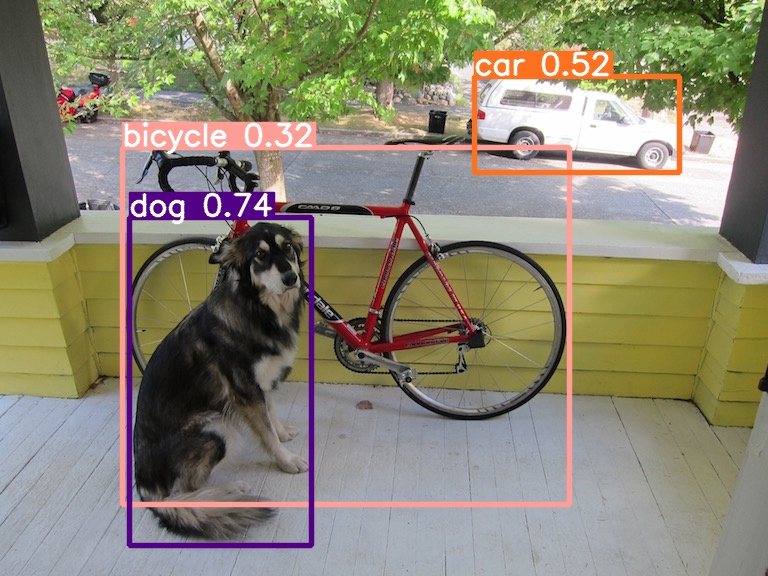

In [6]:
!rm -R yolov5/runs/detect/*
# Run YOLO to classify
!python yolov5/detect.py --weights yolov5/yolov5s.pt --img 1024 --conf 0.25 --source images/ --device MPS
img_path = "/Users/rishinigam/t81_588_course/practice_src/module_5/yolov5/runs/detect/exp/dog.jpg"
Image(filename = img_path, width=300)

In [7]:
import torch

yolo_mdl = torch.hub.load('ultralytics/yolov5', 'yolov5s')

results = yolo_mdl(img_path)
df = results.pandas().xyxy[0]
df

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /Users/rishinigam/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-12-1 Python-3.10.12 torch-2.0.1 CPU

100%|██████████| 14.1M/14.1M [00:02<00:00, 7.35MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,132.873779,220.821030,308.470612,515.138733,0.908319,16,dog
1,474.882477,83.322716,686.546326,171.410065,0.606010,7,truck
2,473.320282,83.045403,686.224670,172.288132,0.529171,2,car
3,129.050278,149.165970,565.909424,429.260345,0.521968,1,bicycle
